# Questão 1 
![alt text]({02815547-C498-458E-999D-8F17A766BC06}.png)

In [9]:
import numpy as np

# ============================
# Parâmetros de Hückel
# ============================
beta0 = -2.5  # eV
h_C = 0.0
h_N = 1.5
k_CC_dupla = 1.1
k_CC_simples = 0.9
k_CN = 0.8

# ============================
# Definição da molécula: Pirrol
# ============================
n = 5
H = np.zeros((n, n))

# Alfas (diagonal)
H[0,0] = h_N * beta0   # Nitrogênio
for i in range(1,5):
    H[i,i] = h_C * beta0   # Carbonos

# Ligações com betas (fora da diagonal)
ligacoes = {
    (0,1): k_CN,
    (1,2): k_CC_dupla,
    (2,3): k_CC_simples,
    (3,4): k_CC_dupla,
    (4,0): k_CN
}

for (i,j),k in ligacoes.items():
    H[i,j] = k * beta0
    H[j,i] = k * beta0

print("Matriz de Hückel (H):")
print(H)

# ============================
# Diagonalização (método QR)
# ============================
valores, vetores = np.linalg.eigh(H)

print("\nAutovalores (níveis de energia π, em eV):")
print(valores)

print("\nOrbitais moleculares (autovetores):")
print(vetores)

# ============================
# Preenchimento eletrônico
# ============================
n_eletrons = 6  # 6 elétrons π no pirrol
ocupados = n_eletrons // 2

print("\nNíveis ocupados (HOMO e abaixo):")
for i in range(ocupados):
    print(f"MO {i+1}: energia = {valores[i]:.3f} eV")

print("\nHOMO:", valores[ocupados-1])
print("LUMO:", valores[ocupados])

# ============================
# População Eletrônica Total (PET_k)
# ============================

PET = np.zeros(n)
for k in range(n):  # para cada orbital atômico
    soma = 0
    for j in range(n):  # percorre todos os orbitais moleculares
        nj = 2 if j < ocupados else 0   # 2 elétrons em cada orbital ocupado
        soma += (vetores[k,j]**2) * nj
    PET[k] = soma

print("\nPopulação Eletrônica Total (PET) em cada orbital atômico:")
for i in range(n):
    print(f"Átomo {i+1}: PET = {PET[i]:.3f}")


print("\nMatriz de densidade eletrônica (P):")
print(PET)





Matriz de Hückel (H):
[[-3.75 -2.    0.    0.   -2.  ]
 [-2.   -0.   -2.75  0.    0.  ]
 [ 0.   -2.75 -0.   -2.25  0.  ]
 [ 0.    0.   -2.25 -0.   -2.75]
 [-2.    0.    0.   -2.75 -0.  ]]

Autovalores (níveis de energia π, em eV):
[-5.86781896 -2.87767057 -1.84621608  2.74548953  4.09621608]

Orbitais moleculares (autovetores):
[[-7.28438046e-01  5.85105279e-01  2.26259852e-17 -3.56412438e-01
  -1.58224388e-16]
 [-3.85674976e-01 -1.27601139e-01 -5.87075984e-01  5.78768314e-01
  -3.94134227e-01]
 [-2.93161763e-01 -5.59056218e-01 -3.94134227e-01 -3.18609989e-01
   5.87075984e-01]
 [-2.93161763e-01 -5.59056218e-01  3.94134227e-01 -3.18609989e-01
  -5.87075984e-01]
 [-3.85674976e-01 -1.27601139e-01  5.87075984e-01  5.78768314e-01
   3.94134227e-01]]

Níveis ocupados (HOMO e abaixo):
MO 1: energia = -5.868 eV
MO 2: energia = -2.878 eV
MO 3: energia = -1.846 eV

HOMO: -1.846216081001178
LUMO: 2.7454895276111397

População Eletrônica Total (PET) em cada orbital atômico:
Átomo 1: PET = 1.746
Á

# Questão 2
![alt text]({54679AC8-F248-4F79-8F94-EBED57A4C088}.png)
![alt text]({CC2B7BB4-C8DE-44BC-B6D9-129F0D99A78E}.png)


Molécula: Benzeno
Níveis de energia: [-2.    -1.015 -1.015  1.015  1.015  2.   ]
Populações q_i: [1. 1. 1. 1. 1. 1.]
Ordens de ligação: [0.76  0.563 0.76  0.563 0.76  0.563]
HOMO = -1.015, LUMO = 1.015, Egap = 2.030
Largura banda W = 4.000
PR HOMO = 4.00, PR LUMO = 4.00


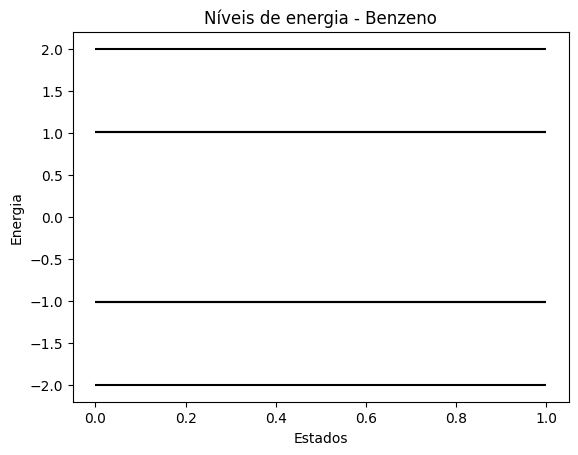

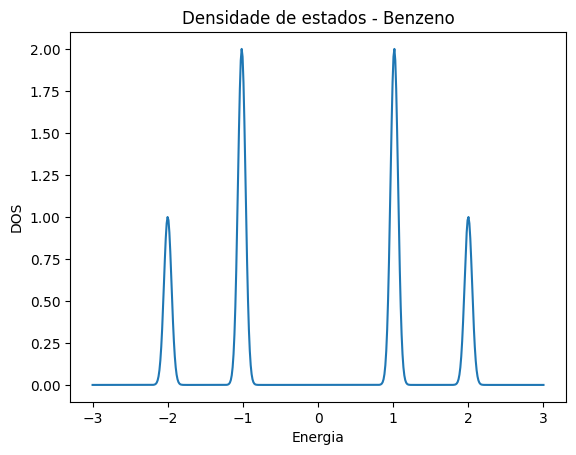

Molécula: Naftaleno
Níveis de energia: [-2.348 -1.623 -1.286 -1.051 -0.637  0.637  1.051  1.286  1.623  2.348]
Populações q_i: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Ordens de ligação: [0.816 0.489 0.816 0.443 0.531 0.443 0.644 0.631 0.705 0.631 0.644]
HOMO = -0.637, LUMO = 0.637, Egap = 1.273
Largura banda W = 4.696
PR HOMO = 6.70, PR LUMO = 6.70


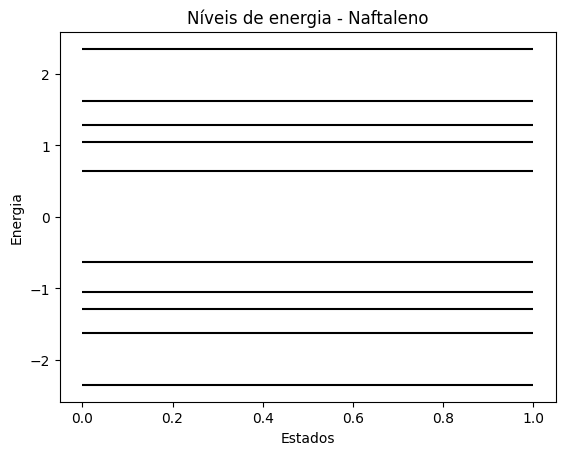

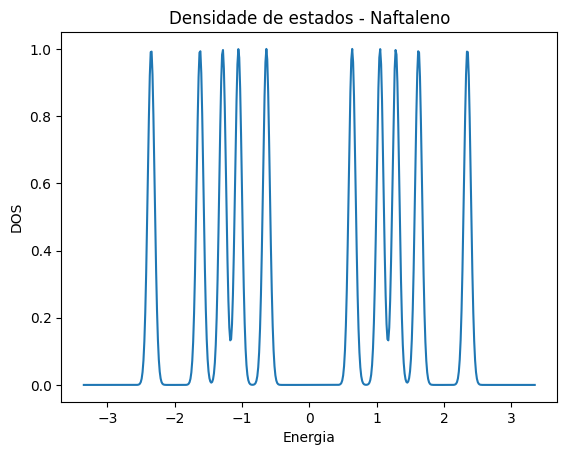

Molécula: Antraceno
Níveis de energia: [-2.47  -2.039 -1.435 -1.387 -1.069 -0.995 -0.432  0.432  0.995  1.069
  1.387  1.435  2.039  2.47 ]
Populações q_i: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Ordens de ligação: [0.826 0.426 0.485 0.426 0.826 0.471 0.699 0.494 0.511 0.494 0.699 0.625
 0.645 0.691 0.645 0.625]
HOMO = -0.432, LUMO = 0.432, Egap = 0.864
Largura banda W = 4.940
PR HOMO = 8.10, PR LUMO = 8.10


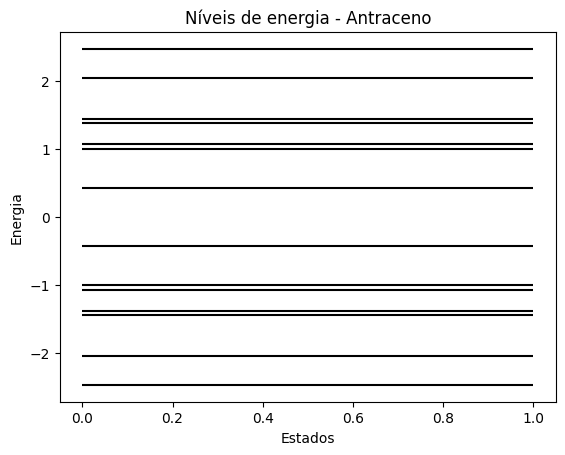

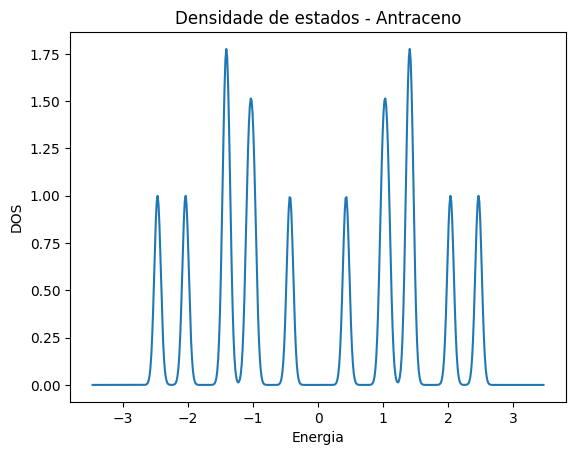

Molécula: Pireno
Níveis de energia: [-2.634 -2.048 -1.914 -1.522 -1.28  -1.183 -0.556 -0.379  0.379  0.556
  1.183  1.28   1.522  1.914  2.048  2.634]
Populações q_i: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Ordens de ligação: [0.875 0.358 0.528 0.29  0.536 0.36  0.696 0.498 0.577 0.462 0.731 0.681
 0.53  0.535 0.487 0.719 0.574 0.696 0.594 0.535 0.507]
HOMO = -0.379, LUMO = 0.379, Egap = 0.758
Largura banda W = 5.267
PR HOMO = 11.67, PR LUMO = 11.67


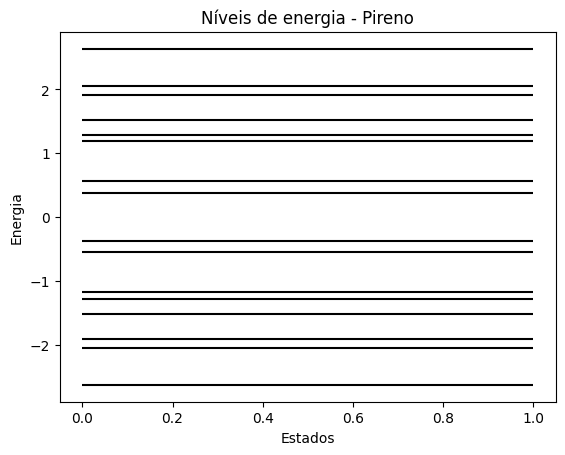

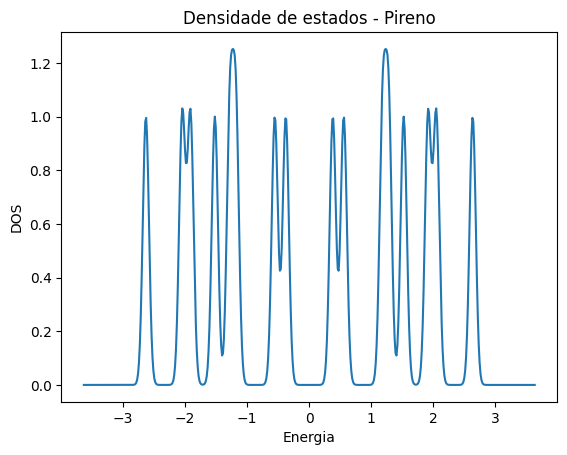

Molécula: Perileno
Níveis de energia: [-2.871 -2.193 -1.96  -1.729 -1.672 -1.459 -1.116 -0.826 -0.735 -0.17
  0.154  0.452  0.844  1.192  1.507  1.652  1.867  2.045  2.437  2.581]
Populações q_i: [1.003 1.11  0.88  0.978 1.107 0.877 0.939 0.973 1.137 1.125 0.981 1.032
 0.843 1.026 0.978 0.946 1.022 0.903 1.037 1.102]
Ordens de ligação: [0.595 0.331 0.607 0.475 0.574 0.475 0.491 0.435 0.551 0.471 0.519 0.478
 0.485 0.534 0.574 0.588 0.481 0.57  0.583 0.715 0.555 0.453 0.798 0.442
 0.517 0.75  0.491]
HOMO = -0.170, LUMO = 0.154, Egap = 0.324
Largura banda W = 5.453
PR HOMO = 11.31, PR LUMO = 9.57


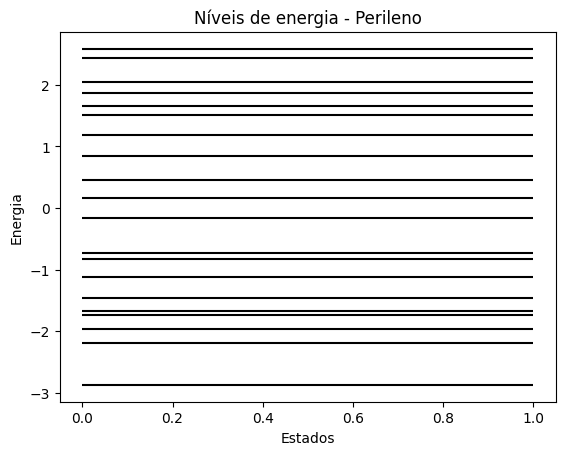

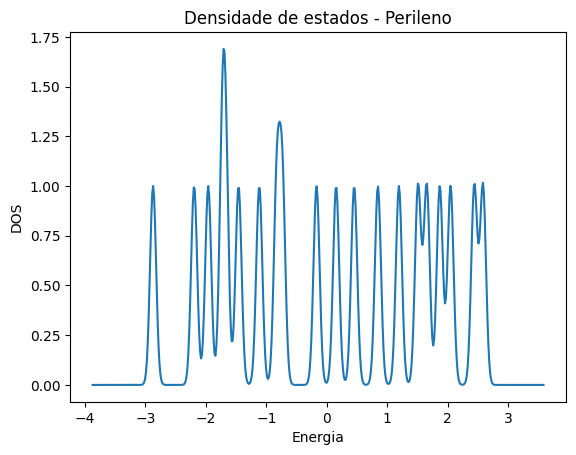

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# =========================
# FUNÇÕES BÁSICAS
# =========================

def build_hamiltonian(N, edges, k_dict):
    H = np.zeros((N, N))
    for i, j, bond in edges:
        H[i, j] = H[j, i] = -k_dict[bond]
    return H

def huckel_solver(H, N):
    E, C = np.linalg.eigh(H)
    n_occ = N // 2  # orbitais ocupados
    return E, C, n_occ

def populations(C, n_occ):
    return 2 * np.sum(C[:, :n_occ]**2, axis=1)

def bond_orders(C, n_occ, edges):
    P = np.zeros(len(edges))
    for k, (i, j, _) in enumerate(edges):
        P[k] = 2 * np.sum(C[i, :n_occ] * C[j, :n_occ])
    return P

def properties(E, C, n_occ):
    HOMO = E[n_occ-1]
    LUMO = E[n_occ]
    Egap = LUMO - HOMO
    W = E[-1] - E[0]
    PR_HOMO = 1 / np.sum(C[:, n_occ-1]**4)
    PR_LUMO = 1 / np.sum(C[:, n_occ]**4)
    return HOMO, LUMO, Egap, W, PR_HOMO, PR_LUMO

# =========================
# FUNÇÕES DE PLOT
# =========================

def plot_energy_levels(E, title):
    plt.figure()
    for e in E:
        plt.hlines(e, 0, 1, colors="black")
    plt.title(f"Níveis de energia - {title}")
    plt.xlabel("Estados")
    plt.ylabel("Energia")
    plt.show()

def plot_dos(E, title, bins=100, sigma=0.05):
    x = np.linspace(min(E)-1, max(E)+1, 500)
    dos = np.zeros_like(x)
    for e in E:
        dos += np.exp(-(x-e)**2/(2*sigma**2))
    plt.figure()
    plt.plot(x, dos)
    plt.title(f"Densidade de estados - {title}")
    plt.xlabel("Energia")
    plt.ylabel("DOS")
    plt.show()

# =========================
# MOLÉCULAS
# =========================

molecules = {}

# Benzeno
molecules["Benzeno"] = {
    "N": 6,
    "edges": [
        (0,1,"C=C"), (1,2,"C-C"), (2,3,"C=C"),
        (3,4,"C-C"), (4,5,"C=C"), (5,0,"C-C")
    ]
}

# Naftaleno
molecules["Naftaleno"] = {
    "N": 10,
    "edges": [
        (0,1,"C=C"), (1,2,"C-C"), (2,3,"C=C"), (3,4,"C-C"), (4,5,"C=C"), (5,0,"C-C"),
        (5,6,"C=C"), (6,7,"C-C"), (7,8,"C=C"), (8,9,"C-C"), (9,4,"C=C")
    ]
}

# Antraceno
molecules["Antraceno"] = {
    "N": 14,
    "edges": [
        (0,1,"C=C"), (1,2,"C-C"), (2,3,"C=C"), (3,4,"C-C"), (4,5,"C=C"), (5,0,"C-C"),
        (2,6,"C=C"), (6,7,"C-C"), (7,8,"C=C"), (8,9,"C-C"), (9,3,"C=C"),
        (7,10,"C=C"), (10,11,"C-C"), (11,12,"C=C"), (12,13,"C-C"), (13,8,"C=C")
    ]
}

# Pireno
molecules["Pireno"] = {
    "N": 16,
    "edges": [
        (0,1,"C=C"), (1,2,"C-C"), (2,3,"C=C"), (3,4,"C-C"), (4,5,"C=C"), (5,0,"C-C"),
        (2,6,"C=C"), (6,7,"C-C"), (7,8,"C=C"), (8,9,"C-C"), (9,3,"C=C"),
        (5,10,"C=C"), (10,11,"C-C"), (11,12,"C=C"), (12,13,"C-C"), (13,4,"C=C"),
        (8,14,"C=C"), (14,15,"C-C"), (15,12,"C=C"), (12,11,"C-C"), (11,7,"C=C")
    ]
}

# Perileno
molecules["Perileno"] = {
    "N": 20,
    "edges": [
        # Primeiro anel (ciclo central esquerdo)
        (0,1,"C=C"), (1,2,"C-C"), (2,3,"C=C"), (3,4,"C-C"), (4,5,"C=C"), (5,0,"C-C"),
        # Segundo anel (superior esquerdo)
        (0,6,"C=C"), (6,7,"C-C"), (7,2,"C=C"),
        # Terceiro anel (inferior esquerdo)
        (3,8,"C=C"), (8,9,"C-C"), (9,5,"C=C"),
        # Quarto anel (superior direito)
        (4,10,"C=C"), (10,11,"C-C"), (11,7,"C=C"),
        # Quinto anel (inferior direito)
        (1,12,"C=C"), (12,13,"C-C"), (13,9,"C=C"),
        # Ligações horizontais finais (conectando todos os 20 átomos)
        (6,14,"C-C"), (14,15,"C=C"), (15,10,"C-C"),
        (12,16,"C-C"), (16,17,"C=C"), (17,11,"C-C"),
        (8,18,"C-C"), (18,19,"C=C"), (19,13,"C-C")
    ]
}

# =========================
# EXECUÇÃO
# =========================

k_dict = {"C=C": 1.1, "C-C": 0.9}

for name, mol in molecules.items():
    N = mol["N"]
    edges = mol["edges"]
    H = build_hamiltonian(N, edges, k_dict)
    E, C, n_occ = huckel_solver(H, N)
    q = populations(C, n_occ)
    p = bond_orders(C, n_occ, edges)
    HOMO, LUMO, Egap, W, PR_HOMO, PR_LUMO = properties(E, C, n_occ)

    print("="*40)
    print(f"Molécula: {name}")
    print("Níveis de energia:", np.round(E, 3))
    print("Populações q_i:", np.round(q, 3))
    print("Ordens de ligação:", np.round(p, 3))
    print(f"HOMO = {HOMO:.3f}, LUMO = {LUMO:.3f}, Egap = {Egap:.3f}")
    print(f"Largura banda W = {W:.3f}")
    print(f"PR HOMO = {PR_HOMO:.2f}, PR LUMO = {PR_LUMO:.2f}")

    # plots
    plot_energy_levels(E, name)
    plot_dos(E, name)


In [10]:
import numpy as np

# ---------- Definições do modelo ----------
BETA0 = -2.5  # eV
h_params = {"C": 0.0, "N": 1.5}
k_params = {
    "C=C": 1.1,
    "C-C": 0.9,
    "C-N": 0.8
}

def build_huckel_matrix(N, atoms, bonds):
    """
    Monta a matriz de Hückel.
    N: número de átomos
    atoms: lista com os tipos ["C","C","N",...]
    bonds: lista de tuplas (i,j,tipo) onde tipo está em k_params
    """
    H = np.zeros((N, N))
    
    # Diagonal (α)
    for i, atom in enumerate(atoms):
        H[i, i] = h_params[atom] * BETA0
    
    # Ligações (β)
    for i, j, tipo in bonds:
        H[i, j] = H[j, i] = k_params[tipo] * BETA0
    
    return H

def solve_huckel(H, N_electrons):
    """
    Resolve o problema de autovalores e calcula PET.
    """
    E, C = np.linalg.eigh(H)  # E: autovalores, C: autovetores (colunas)
    
    # Ordena
    idx = np.argsort(E)
    E = E[idx]
    C = C[:, idx]
    
    # Ocupação eletrônica (dois elétrons por orbital)
    occ = np.zeros(len(E))
    n_filled = N_electrons // 2
    occ[:n_filled] = 2
    
    # PET_k = soma_j (C_kj^2 * n_j)
    PET = np.sum((C**2) * occ, axis=1)
    
    return E, C, PET

def solve_huckel(H):
    """Diagonaliza a matriz de Hückel e retorna autovalores e autovetores."""
    E, C = np.linalg.eigh(H)
    return E, C

def occupation(N_electrons, E, C):
    """Ocupação de orbitais: retorna HOMO, LUMO, gap e índices ocupados."""
    idx_sorted = np.argsort(E)
    E_sorted = E[idx_sorted]
    C_sorted = C[:, idx_sorted]
    
    homo_index = N_electrons//2 - 1
    lumo_index = homo_index + 1
    
    homo = E_sorted[homo_index]
    lumo = E_sorted[lumo_index]
    gap = lumo - homo
    
    return homo_index, lumo_index, homo, lumo, gap, E_sorted, C_sorted

def population(C, occ):
    """População eletrônica por sítio."""
    q = np.sum(2 * np.abs(C[:, :occ])**2, axis=1)
    return q

def bond_order(C, occ):
    """Ordem de ligação π para cada par i-j."""
    n = C.shape[0]
    P = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            P[i, j] = np.sum(2 * C[i, :occ] * C[j, :occ])
    return P

def participation_ratio(C, mu):
    """Participation Ratio (PR) para orbital mu."""
    num = (np.sum(C[:, mu]**2))**2
    den = np.sum(C[:, mu]**4)
    return num / den

# =====================================================
# Funções de plotagem
# =====================================================

def plot_stick(E, homo_index, lumo_index):
    """Stick plot dos níveis de energia."""
    plt.figure()
    plt.stem(E, use_line_collection=True)
    plt.axhline(0, color='black', linewidth=0.7)
    plt.axhline(E[homo_index], color='red', linestyle='--', label='HOMO')
    plt.axhline(E[lumo_index], color='blue', linestyle='--', label='LUMO')
    plt.xlabel("Índice do orbital")
    plt.ylabel("Energia (E/β)")
    plt.legend()
    plt.title("Stick plot dos níveis de energia")
    plt.show()

def plot_homo_lumo_map(C, mu):
    """Mapa de coeficientes de HOMO/LUMO."""
    plt.figure()
    sizes = 500 * np.abs(C[:, mu])**2
    colors = np.sign(C[:, mu])
    plt.scatter(range(len(C[:, mu])), [0]*len(C[:, mu]), 
                s=sizes, c=colors, cmap='bwr', alpha=0.7, edgecolor="k")
    plt.title(f"Mapa orbital {mu} (HOMO/LUMO)")
    plt.colorbar(label="Sinal do coeficiente")
    plt.show()

def plot_gap_vs_N(N_list, gaps):
    """Eg vs N."""
    plt.figure()
    plt.plot(N_list, gaps, 'o-')
    plt.xlabel("N (número de átomos)")
    plt.ylabel("E_gap (β)")
    plt.title("Gap vs N")
    plt.show()

def plot_gap_vs_invN(N_list, gaps):
    """Eg vs 1/N."""
    plt.figure()
    plt.plot(1/np.array(N_list), gaps, 'o-')
    plt.xlabel("1/N")
    plt.ylabel("E_gap (β)")
    plt.title("Gap vs 1/N")
    plt.show()

def plot_bandwidth(E):
    """Plota a largura da banda W."""
    W = max(E) - min(E)
    print(f"Largura da banda W = {W:.3f}")
    return W






In [11]:
# NAFTALENO
atoms_naftaleno = ["C"] * 10
bonds_naftaleno = bonds_naftaleno = [
    (0,1), (1,2), (2,3), (3,4), (4,5), (5,0),   # anel 1
    (5,6), (6,7), (7,8), (8,9), (9,4)          # anel 2 fundido
]  # segundo anel fundido no C4–C5
H = build_huckel_matrix(10, atoms_naftaleno, bonds_naftaleno)
E, C, PET = solve_huckel(H, N_electrons=10)
print("=======NAFTALENO=======")
print("Matriz de Hückel (H):")
print(H)
print("\nAutovalores (níveis de energia π, em eV):")
print(E)
print("\nOrbitais moleculares (autovetores):")
print(C)
print("\nPopulação Eletrônica Total (PET) em cada orbital atômico:", PET)


ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
# ANTRACENO
atoms_antraceno = ["C"] * 14
bonds_antraceno = [
    (0,1), (1,2), (2,3), (3,4), (4,5), (5,0),   # anel 1
    (2,6), (6,7), (7,8), (8,9), (9,3),          # anel 2
    (7,10), (10,11), (11,12), (12,13), (13,8)   # anel 3
]
H = build_huckel_matrix(14, atoms_antraceno, bonds_antraceno)
E, C, PET = solve_huckel(H, N_electrons=14)
print("=======ANTRACENO=========")
print("Matriz de Hückel (H):")
print(H)
print("\nAutovalores (níveis de energia π, em eV):")
print(E)
print("\nOrbitais moleculares (autovetores):")
print(C)
print("\nPopulação Eletrônica Total (PET) em cada orbital atômico:", PET)

In [ ]:
# PIRENO
atoms_pireno = ["C"] * 16
bonds_pireno = bonds_pireno = [
    (0,1), (1,2), (2,3), (3,4), (4,5), (5,0),    # anel superior esquerdo
    (2,6), (6,7), (7,8), (8,9), (9,3),           # anel superior direito
    (5,10), (10,11), (11,12), (12,13), (13,4),   # anel inferior esquerdo
    (8,14), (14,15), (15,12), (12,11), (11,7),   # anel inferior direito 
]

H = build_huckel_matrix(16, atoms_pireno, bonds_pireno)
E, C, PET = solve_huckel(H, N_electrons=16)
print("=======PIRENO=========")
print("Matriz de Hückel (H):")
print(H)
print("\nAutovalores (níveis de energia π, em eV):")
print(E)
print("\nOrbitais moleculares (autovetores):")
print(C)
print("\nPopulação Eletrônica Total (PET) em cada orbital atômico:", PET)

In [ ]:
# PERILENO
atoms_perileno = ["C"] * 20
bonds_perileno = [
    (0,1), (1,2), (2,3), (3,4), (4,5), (5,0),     # anel central superior
    (5,6), (6,7), (7,8), (8,9), (9,4),            # anel central inferior
    (0,10), (10,11), (11,12), (12,13), (13,1),    # anel superior esquerdo
    (2,14), (14,15), (15,16), (16,17), (17,3),    # anel superior direito
    (6,18), (18,19), (19,20), (20,21), (21,7),    # anel inferior esquerdo
    (8,22), (22,23), (23,24), (24,25), (25,9)     # anel inferior direito
]
H = build_huckel_matrix(20, atoms_perileno, bonds_perileno)
E, C, PET = solve_huckel(H, N_electrons=20)
print("=======PERILENO=========")
print("Matriz de Hückel (H):")
print(H)
print("\nAutovalores (níveis de energia π, em eV):")
print(E)
print("\nOrbitais moleculares (autovetores):")
print(C)
print("\nPopulação Eletrônica Total (PET) em cada orbital atômico:", PET)